<h1> PCA </h1>

## Table of Contents

1. [Data Description](#dd)
2. [Importing the packages and dataset](#import) 
3. [Exploratory Data Analysis](#eda)
4. [Splitting labels and features](#split)
5. [Normalizing the input columns](#normalize)
6. [Logistic Regression](#lr)
7. [Applying PCA to Logistic Regression model](#pcalr)
8. [Random Forest](#rf)
9. [Applying PCA to Random Forest model](#pcarf)

### 1. Data Description  <a id='dd'>

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.
   
   1.   OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
   2.   F1R:   continuous (count in ROI (region of interest) 1 in rest)
   3.   F1S:   continuous (count in ROI 1 in stress)
   4.   F2R:   continuous (count in ROI 2 in rest)
   5.   F2S:   continuous (count in ROI 2 in stress)
   6.   F3R:   continuous (count in ROI 3 in rest)
   7.   F3S:   continuous (count in ROI 3 in stress)
   8.   F4R:   continuous (count in ROI 4 in rest)
   9.   F4S:   continuous (count in ROI 4 in stress)
   10.  F5R:   continuous (count in ROI 5 in rest)
   11.  F5S:   continuous (count in ROI 5 in stress)
   12.  F6R:   continuous (count in ROI 6 in rest)
   13.  F6S:   continuous (count in ROI 6 in stress)
   14.  F7R:   continuous (count in ROI 7 in rest)
   15.  F7S:   continuous (count in ROI 7 in stress)
   16.  F8R:   continuous (count in ROI 8 in rest)
   17.  F8S:   continuous (count in ROI 8 in stress)
   18.  F9R:   continuous (count in ROI 9 in rest)
   19.  F9S:   continuous (count in ROI 9 in stress)
   20.  F10R:  continuous (count in ROI 10 in rest)
   21.  F10S:  continuous (count in ROI 10 in stress)
   22.  F11R:  continuous (count in ROI 11 in rest)
   23.  F11S:  continuous (count in ROI 11 in stress)
   24.  F12R:  continuous (count in ROI 12 in rest)
   25.  F12S:  continuous (count in ROI 12 in stress)
   26.  F13R:  continuous (count in ROI 13 in rest)
   27.  F13S:  continuous (count in ROI 13 in stress)
   28.  F14R:  continuous (count in ROI 14 in rest)
   29.  F14S:  continuous (count in ROI 14 in stress)
   30.  F15R:  continuous (count in ROI 15 in rest)
   31.  F15S:  continuous (count in ROI 15 in stress)
   32.  F16R:  continuous (count in ROI 16 in rest)
   33.  F16S:  continuous (count in ROI 16 in stress)
   34.  F17R:  continuous (count in ROI 17 in rest)
   35.  F17S:  continuous (count in ROI 17 in stress)
   36.  F18R:  continuous (count in ROI 18 in rest)
   37.  F18S:  continuous (count in ROI 18 in stress)
   38.  F19R:  continuous (count in ROI 19 in rest)
   39.  F19S:  continuous (count in ROI 19 in stress)
   40.  F20R:  continuous (count in ROI 20 in rest)
   41.  F20S:  continuous (count in ROI 20 in stress)
   42.  F21R:  continuous (count in ROI 21 in rest)
   43.  F21S:  continuous (count in ROI 21 in stress)
   44.  F22R:  continuous (count in ROI 22 in rest)
   45.  F22S:  continuous (count in ROI 22 in stress)
   
   ** Objective **
   
   Our goal is to predict whether the SPECT images are normal or not.

### 2. Importing the packages and dataset  <a id='import'>

In [2]:
# Importing the packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Loading the train data

url = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_df= pd.read_table(url,sep=',',names=col_names)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys


In [4]:
spectf_df.shape

(80, 45)

In [5]:
# Loading the Test data

url = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_test= pd.read_table(url,sep=',',names=col_names)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys


In [6]:
spectf_test.shape

(187, 45)

***So the training data has 80 records and the test data has 187 records***

In [7]:
spectf_df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [8]:
spectf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
target    80 non-null int64
F1R       80 non-null int64
F1S       80 non-null int64
F2R       80 non-null int64
F2S       80 non-null int64
F3R       80 non-null int64
F3S       80 non-null int64
F4R       80 non-null int64
F4S       80 non-null int64
F5R       80 non-null int64
F5S       80 non-null int64
F6R       80 non-null int64
F6S       80 non-null int64
F7R       80 non-null int64
F7S       80 non-null int64
F8R       80 non-null int64
F8S       80 non-null int64
F9R       80 non-null int64
F9S       80 non-null int64
F10R      80 non-null int64
F10S      80 non-null int64
F11R      80 non-null int64
F11S      80 non-null int64
F12R      80 non-null int64
F12S      80 non-null int64
F13R      80 non-null int64
F13S      80 non-null int64
F14R      80 non-null int64
F14S      80 non-null int64
F15R      80 non-null int64
F15S      80 non-null int64
F16R      80 non-null int64
F

In [9]:
spectf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
target    187 non-null int64
F1R       187 non-null int64
F1S       187 non-null int64
F2R       187 non-null int64
F2S       187 non-null int64
F3R       187 non-null int64
F3S       187 non-null int64
F4R       187 non-null int64
F4S       187 non-null int64
F5R       187 non-null int64
F5S       187 non-null int64
F6R       187 non-null int64
F6S       187 non-null int64
F7R       187 non-null int64
F7S       187 non-null int64
F8R       187 non-null int64
F8S       187 non-null int64
F9R       187 non-null int64
F9S       187 non-null int64
F10R      187 non-null int64
F10S      187 non-null int64
F11R      187 non-null int64
F11S      187 non-null int64
F12R      187 non-null int64
F12S      187 non-null int64
F13R      187 non-null int64
F13S      187 non-null int64
F14R      187 non-null int64
F14S      187 non-null int64
F15R      187 non-null int64
F15S      187 non-null in

***Descriptive Statistics***

In [10]:
spectf_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,68.650000,67.55000,69.550000,70.850000,67.100000,67.687500,72.075000,71.387500,64.362500,...,65.18750,64.662500,65.612500,65.01250,69.437500,68.412500,66.33750,65.100000,55.975000,55.075000
std,0.503155,5.594075,6.88403,5.901941,6.326757,6.251278,6.622925,4.090047,5.715831,7.425996,...,5.71273,7.538834,7.694308,9.44336,7.809186,8.582723,10.62591,11.345662,10.779698,12.119422
min,0.000000,57.000000,51.00000,52.000000,51.000000,47.000000,46.000000,63.000000,56.000000,26.000000,...,31.00000,13.000000,33.000000,23.00000,31.000000,30.000000,31.00000,30.000000,11.000000,11.000000
25%,0.000000,64.750000,64.00000,66.000000,67.000000,63.750000,63.750000,68.750000,69.000000,61.000000,...,63.00000,63.000000,62.750000,62.00000,65.000000,65.000000,64.00000,63.000000,53.000000,52.750000
50%,0.500000,69.000000,67.00000,70.000000,72.000000,68.000000,68.500000,72.500000,72.000000,65.000000,...,66.00000,65.500000,66.000000,66.50000,70.500000,71.000000,69.00000,68.000000,59.000000,58.000000
75%,1.000000,72.000000,73.00000,74.000000,75.250000,71.000000,71.250000,75.000000,75.000000,68.250000,...,68.00000,69.000000,71.000000,71.00000,74.000000,74.000000,73.25000,71.000000,63.000000,63.000000
max,1.000000,80.000000,81.00000,82.000000,84.000000,78.000000,89.000000,79.000000,83.000000,77.000000,...,73.00000,73.000000,77.000000,77.00000,83.000000,80.000000,79.00000,83.000000,71.000000,73.000000


### 3. Exploratory Data Analysis  <a id='eda'>

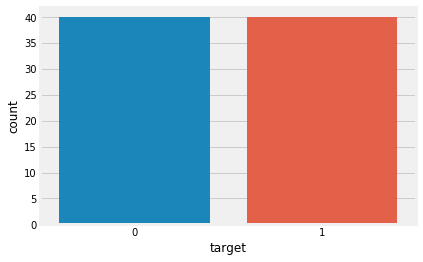

In [11]:
sns.countplot(x='target', data = spectf_df);

The values in the training dataset are equal and balanced 

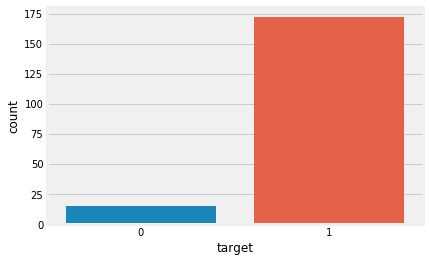

In [12]:
sns.countplot(x='target', data = spectf_test);

The values in the test dataset are not equal and imbalanced 

Text(0.5, 1.0, 'Correlation between different features')

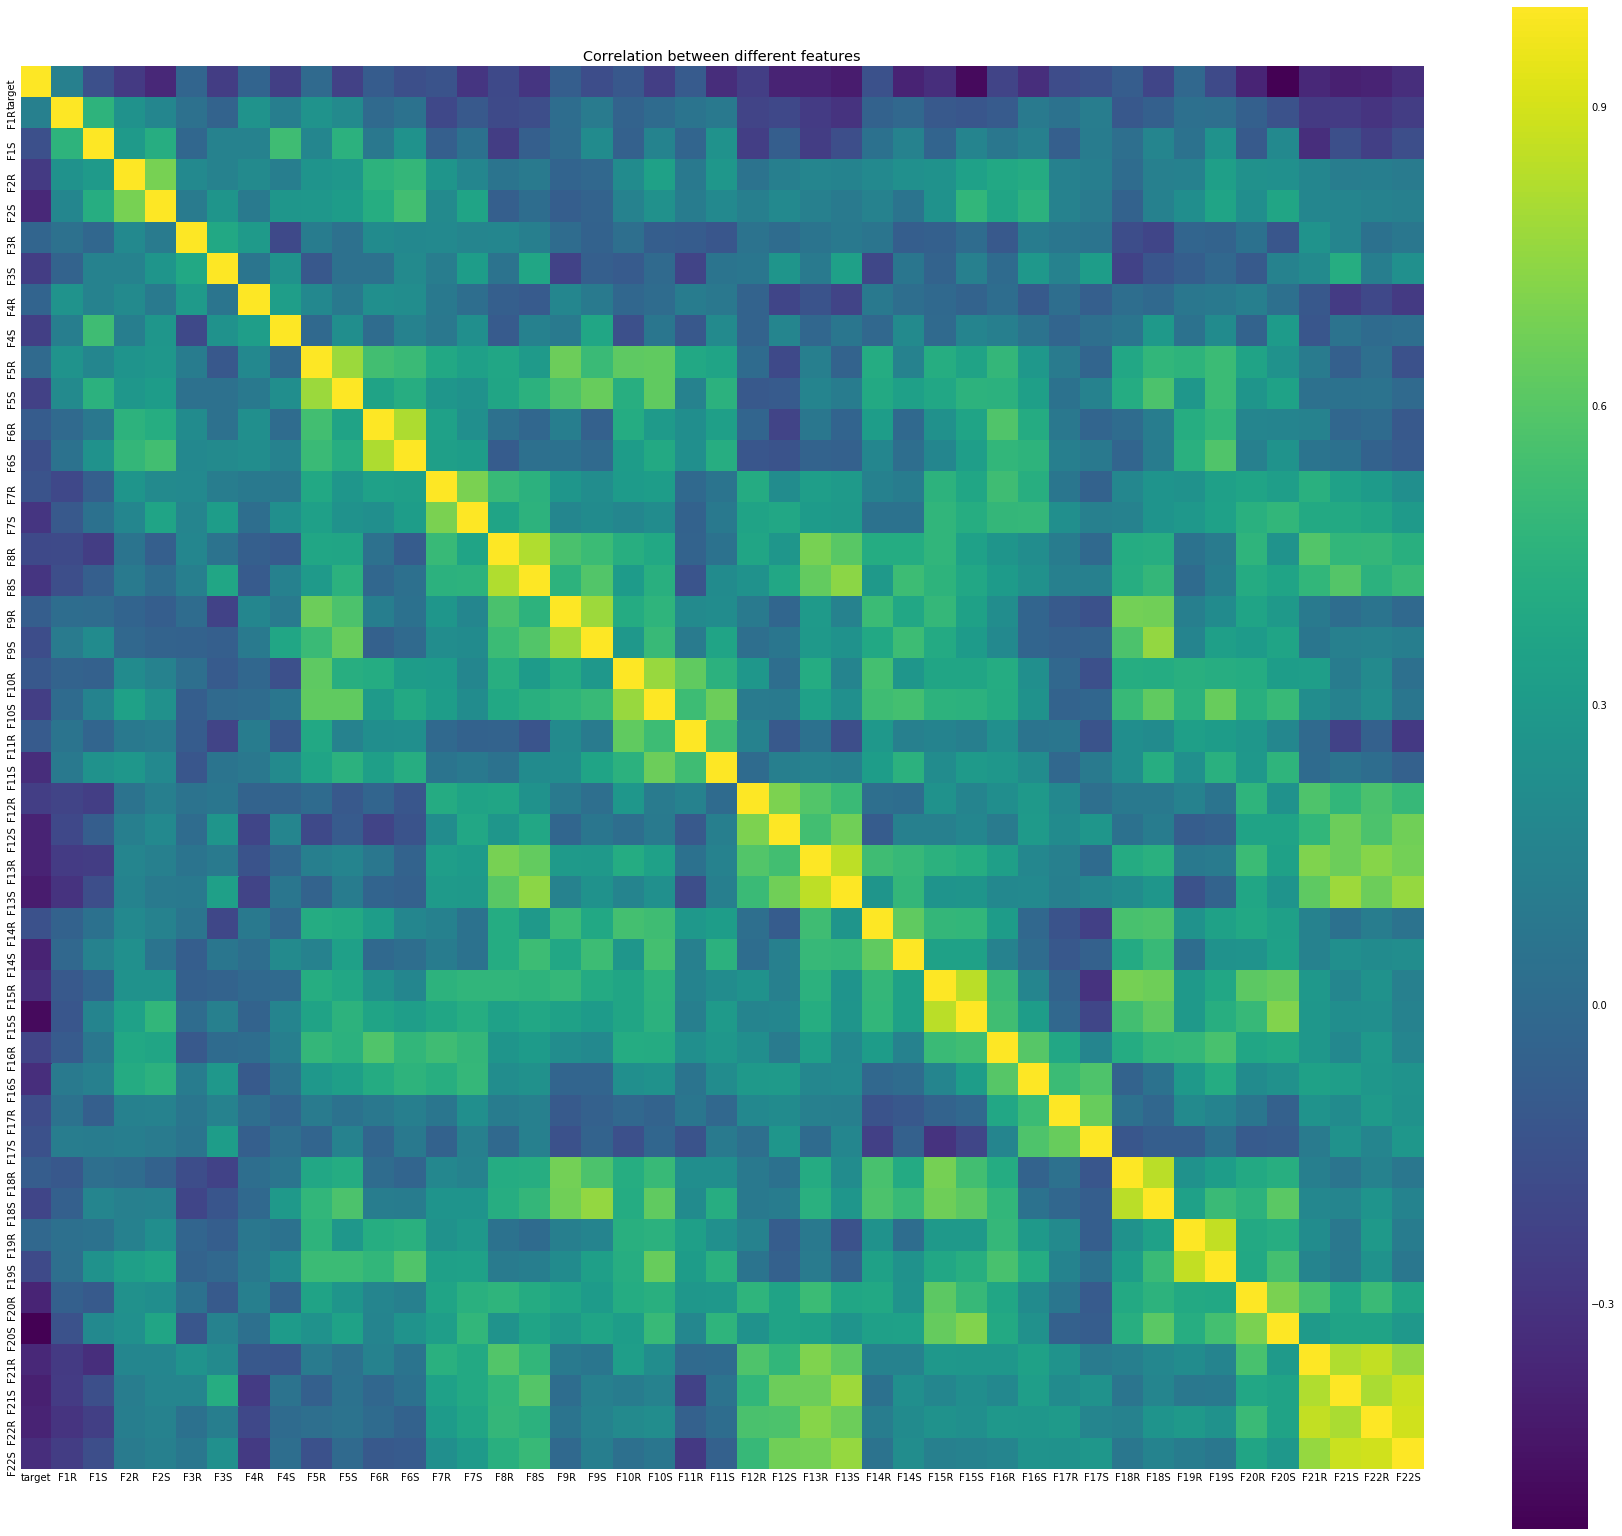

In [14]:
#check the correlation between the variables

correlation = spectf_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [16]:
correlation.round(2)

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.00,0.13,-0.15,-0.26,-0.36,-0.03,-0.26,-0.04,-0.24,-0.00,...,-0.08,-0.21,-0.02,-0.18,-0.38,-0.53,-0.35,-0.39,-0.38,-0.33
F1R,0.13,1.00,0.46,0.25,0.17,0.04,-0.05,0.26,0.12,0.26,...,-0.11,-0.06,0.03,0.02,-0.07,-0.14,-0.27,-0.26,-0.30,-0.26
F1S,-0.15,0.46,1.00,0.30,0.43,-0.02,0.14,0.14,0.53,0.18,...,0.03,0.17,0.05,0.25,-0.10,0.19,-0.33,-0.16,-0.24,-0.16
F2R,-0.26,0.25,0.30,1.00,0.69,0.19,0.14,0.20,0.12,0.26,...,0.00,0.13,0.14,0.33,0.24,0.24,0.17,0.12,0.12,0.10
F2S,-0.36,0.17,0.43,0.69,1.00,0.10,0.27,0.10,0.28,0.28,...,-0.05,0.14,0.22,0.37,0.22,0.37,0.17,0.17,0.15,0.13
F3R,-0.03,0.04,-0.02,0.19,0.10,1.00,0.39,0.30,-0.19,0.11,...,-0.17,-0.21,-0.03,-0.05,0.05,-0.12,0.26,0.17,0.05,0.08
F3S,-0.26,-0.05,0.14,0.14,0.27,0.39,1.00,0.07,0.25,-0.11,...,-0.22,-0.12,-0.08,-0.02,-0.10,0.14,0.20,0.42,0.12,0.24
F4R,-0.04,0.26,0.14,0.20,0.10,0.30,0.07,1.00,0.32,0.18,...,0.02,-0.01,0.08,0.09,0.12,0.03,-0.11,-0.26,-0.19,-0.26
F4S,-0.24,0.12,0.53,0.12,0.28,-0.19,0.25,0.32,1.00,-0.01,...,0.07,0.29,0.05,0.21,-0.04,0.31,-0.12,0.06,-0.00,0.02
F5R,-0.00,0.26,0.18,0.26,0.28,0.11,-0.11,0.18,-0.01,1.00,...,0.39,0.48,0.46,0.52,0.36,0.25,0.10,-0.06,0.02,-0.15


There seems to be no correlation between the variables 

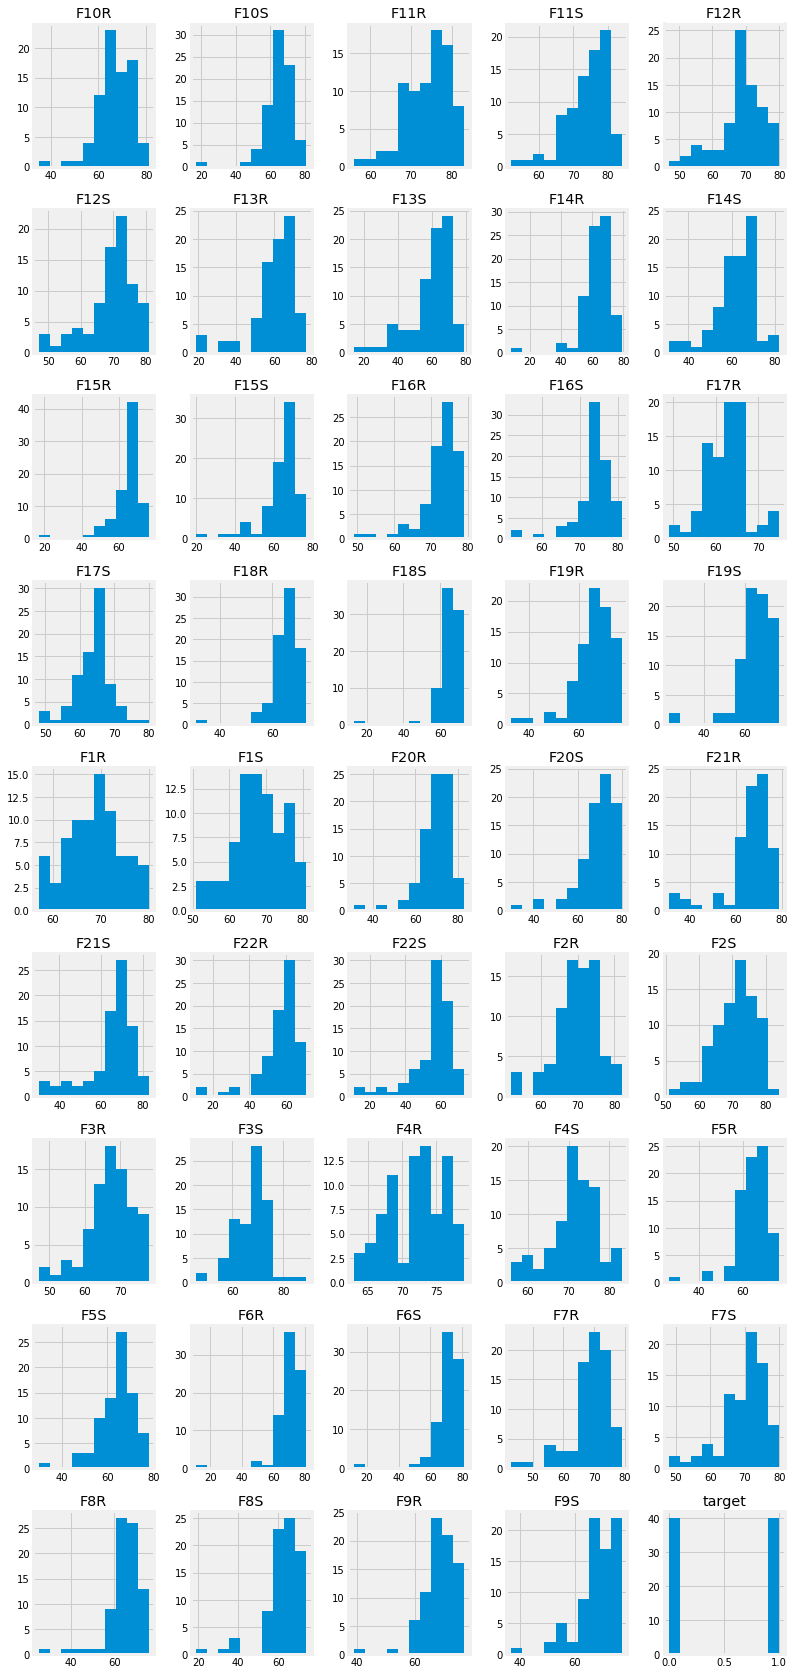

In [18]:
#Lets plot histogram to check the distributions
spectf_df.hist(bins=10, figsize=(12,30), layout=(9,5));

Many of histogram plots have the same range and follow normal distribution

### 4. Splitting labels and features   <a id='split'>

In [19]:
target = spectf_df['target']
spectf_df.drop('target',axis=1,inplace=True)

In [21]:
#Checking the shape after dropping target from spectf_df
spectf_df.shape

(80, 44)

In [22]:
target_t = spectf_test['target']
spectf_test.drop('target',axis=1,inplace=True)

In [24]:
#Checking the shape after dropping target from spectf_test
spectf_test.shape

(187, 44)

In [28]:
print(target.value_counts())
print(target_t.value_counts())

1    40
0    40
Name: target, dtype: int64
1    172
0     15
Name: target, dtype: int64


### 5. Normalizing the input columns   <a id='normalize'>
Most of the distribution of columns follow normal distribution. Hence we can scale them using Standard Scaler to preprocess the data.

Standard Scaler standardize features by removing the mean and scaling to unit variance.<br>
Each value is reduced using the following formula
$$ z = \frac {x - \mu}{\sigma}  $$
Where x is the value,  <br>
$\mu$ is the mean of that columns,  <br>
$\sigma$ is the standard deviation of that columns

In [29]:
#Scaling the Train and Test data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
spect_df = scaler.fit_transform(spectf_df)
spect_test = scaler.fit_transform(spectf_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
spect_df

array([[-1.73592319, -2.27310275,  0.07672715, ...,  0.78938997,
         0.74915189,  0.99016585],
       [ 0.60262619, -0.81130034, -0.09377763, ...,  0.52330347,
         0.00233381,  0.24287087],
       [ 0.42273777, -0.81130034,  0.07672715, ..., -2.13756161,
        -0.46442749, -0.75352244],
       ...,
       [-0.29681588, -0.51893986,  0.58824149, ...,  1.32156299,
         1.02920866,  1.07319862],
       [-0.11692747, -0.37275961,  0.41773671, ..., -0.80712907,
         0.18903833, -0.91958799],
       [-0.4767043 , -1.98074227, -0.09377763, ...,  0.25721696,
         0.28239059,  0.32590364]])

In [31]:
spect_test

array([[ 0.20940529,  0.41596002,  0.68734602, ...,  0.96547463,
         0.59118869,  1.28968911],
       [ 1.10446332,  1.00822796,  0.39455854, ..., -0.02516326,
         0.44098178,  0.22637971],
       [ 1.99952135,  0.02111472, -0.33741018, ...,  0.34632595,
        -0.61046658, -0.43818867],
       ...,
       [ 1.10446332,  0.90951664,  0.54095228, ...,  1.0273895 ,
         1.19201632,  1.48905963],
       [-0.68565274, -0.17630793,  0.54095228, ...,  1.08930437,
         1.41732668,  1.42260279],
       [-0.12624147,  0.21853737, -0.04462269, ...,  0.34632595,
         0.44098178,  0.35929338]])

### 6. Logistic Regression   <a id='lr'>

In [32]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()  

# Start time
start = time.time()
# fit model
logreg.fit(spect_df, target)
# End time
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.1567671298980713


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# make class predictions for the testing set
y_pred_class = logreg.predict(spect_test)

In [34]:
# calculate accuracy and other metrics
from sklearn import metrics

print(metrics.accuracy_score(target_t, y_pred_class))

0.5240641711229946


In [35]:
print (metrics.classification_report(target_t, y_pred_class))

              precision    recall  f1-score   support

           0       0.13      0.87      0.23        15
           1       0.98      0.49      0.66       172

   micro avg       0.52      0.52      0.52       187
   macro avg       0.55      0.68      0.44       187
weighted avg       0.91      0.52      0.62       187



In [41]:
#Importing Confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(target_t,y_pred_class)
cf

array([[13,  2],
       [87, 85]], dtype=int64)

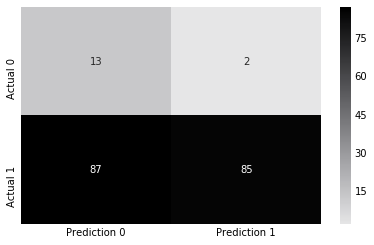

In [40]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf,cmap = cmap,xticklabels=['Prediction 0','Prediction 1'],yticklabels=['Actual 0','Actual 1'], annot=True,
            fmt='d')

### Applying PCA to logistic regression model   <a id='pcalr'>

In [42]:
# Fitting the PCA on the data

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spect_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
# Minimum number of components for which the variance is 90% is 15

pca.explained_variance_ratio_[:15].sum()

0.8934760153256511

In [44]:
# consider first 15 components as they are explaining the 90% of variation in the data

x_pca = PCA(n_components=15)
spect_df_pca = x_pca.fit_transform(spect_df)
spect_test_pca = x_pca.fit_transform(spect_test)

Text(0.5, 1.0, 'Correlation between different features')

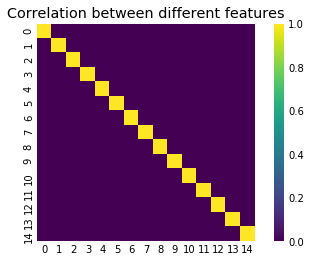

In [45]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(spect_df_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

We can see that after applying PCA, there is no correlation among any components

In [46]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pca_logreg = LogisticRegression(class_weight='balanced')

start = time.time()
# fit model
pca_logreg.fit(spect_df_pca, target)
end = time.time()
training_time = end-start
print("Time required to train a Logistic Regression after PCA: ", training_time)

Time required to train a Logistic Regression after PCA:  0.015619993209838867


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Observation**

Here we observed that after PCA, the training time has reduced slightly. <br>
The original dataset had 45 features to train the model.  <br>
After PCA, we are only using 15 features which takes less time to train.

In [47]:
# make class predictions for the testing set
y_pred_class_pca = pca_logreg.predict(spect_test_pca)

In [48]:
# calculating the accuracy
print(metrics.accuracy_score(target_t, y_pred_class_pca))


0.5508021390374331


In [49]:
print (metrics.classification_report(target_t, y_pred_class_pca))

              precision    recall  f1-score   support

           0       0.14      0.87      0.24        15
           1       0.98      0.52      0.68       172

   micro avg       0.55      0.55      0.55       187
   macro avg       0.56      0.69      0.46       187
weighted avg       0.91      0.55      0.65       187



In [54]:
cf_2 = confusion_matrix(target_t,y_pred_class_pca)
cf_2

array([[13,  2],
       [82, 90]], dtype=int64)

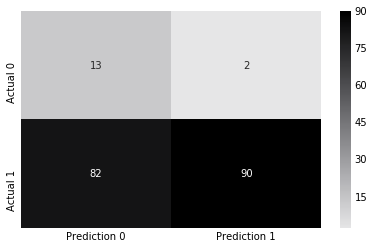

In [55]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_2,cmap = cmap,xticklabels=['Prediction 0','Prediction 1'],yticklabels=['Actual 0','Actual 1'], annot=True,
            fmt='d')

### Random Forest   <a id='rf'>

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rf_model=rf_clf.fit(spect_df,target)
end = time.time()
training_time = end-start
print("Time required to train Random Forest Model: ", training_time)

rf_prediction = rf_model.predict(spect_test)

Time required to train Random Forest Model:  0.07494211196899414


In [57]:
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,rf_prediction))

0.47058823529411764


In [58]:
print(metrics.classification_report(target_t,y_pred_class_pca))

              precision    recall  f1-score   support

           0       0.14      0.87      0.24        15
           1       0.98      0.52      0.68       172

   micro avg       0.55      0.55      0.55       187
   macro avg       0.56      0.69      0.46       187
weighted avg       0.91      0.55      0.65       187



In [59]:
cf_3 = confusion_matrix(target_t,y_pred_class_pca)
cf_3      

array([[13,  2],
       [82, 90]], dtype=int64)

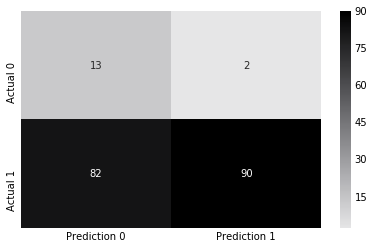

In [60]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_3,cmap = cmap,xticklabels=['Prediction 0','Prediction 1'],yticklabels=['Actual 0','Actual 1'], annot=True,
            fmt='d')

### Applying PCA to Random Forest model   <a id='pcarf'>

In [61]:
rfClassifier=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rfClassifier.fit(spect_df_pca,target)
end = time.time()
training_time = end-start
print("Time required to train a Random Forest model after PCA is :", training_time)


Time required to train a Random Forest model after PCA is : 0.04799222946166992


**Observation**

Again we have observed that after PCA, the training time has reduced from 0.074 to 0.047

In [63]:
# Now test the model
# Consider first 15 components as they are explaining the 90% of variation in the data
test_pred = rfClassifier.predict(spect_test_pca)
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,test_pred))


0.5080213903743316


In [64]:
print(metrics.classification_report(target_t,test_pred))

              precision    recall  f1-score   support

           0       0.13      0.87      0.22        15
           1       0.98      0.48      0.64       172

   micro avg       0.51      0.51      0.51       187
   macro avg       0.55      0.67      0.43       187
weighted avg       0.91      0.51      0.61       187



In [65]:
cf_4 = confusion_matrix(target_t,test_pred)
cf_4      

array([[13,  2],
       [90, 82]], dtype=int64)

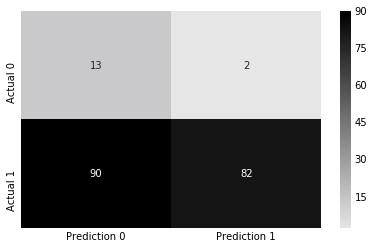

In [66]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_4,cmap = cmap,xticklabels=['Prediction 0','Prediction 1'],yticklabels=['Actual 0','Actual 1'], annot=True,
            fmt='d')

PCA is generally used for visualizing high dimensional data, or to speed up Machine Learning algorithms